# Major 4/5 Replacement Assignment
Please follow this template in implementing your solution for the take-home assignment. TAs will only consider the code provided in the `CODE CELL` to mark your work. The `TESTING CELL` is provided for your convenience (and to remind you to test your code periodically as you implement your solutions to the given problems!).

Remember to:
1. `Save and Checkpoint` often!
2. `Restart the kernel and Run all cells` to ensure that everything is working properly prior to submission.

Good Luck!
***

In [1]:
Name: Muqtadir Hussain
MacID: hussam43

## PROBLEM 1

### CODE CELL

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def ListMaker(file):                     # Creates 2 lists of floats from the .txt file (twoTheta list and intensity list),
    with open(file, 'r') as f:           # Removes the 3 asterisks from the intensity list
        lines = f.readlines()            # Also returns a list of intensities in string form for use in later functions(y)
        twoTheta = [float(line.split()[0]) for line in lines]
        y = [(line.split()[1]) for line in lines]
        y2 = [i.replace('*', '') for i in y]
        intensities = [float(i) for i in y2]
        d = [twoTheta, intensities, y]
    return d


def peakIndex(Lst):                                            # This function takes the list of intensities in string form
    IdxLst = [i for i, j in enumerate(Lst) if j.endswith('*')] # and returns a list of indexes for the peak intensities(*)
    return IdxLst


def BraggAngle(IdxLst,twoThetaLst):                          # This function uses the indexes previously found to find the
    peakTheta = []                                           # corresponding twoTheta angles of the peak intensities
    peakTheta.append((twoThetaLst[IdxLst[0]]/2)*math.pi/180) # It then returns a list of theta values in radians
    peakTheta.append((twoThetaLst[IdxLst[1]]/2)*math.pi/180)
    peakTheta.append((twoThetaLst[IdxLst[2]]/2)*math.pi/180)    
    return peakTheta

def peakIntensity(IdxLst,IntensityLst):             # This function uses the previously found indexes and returns a list of
    peakIntensity = []                              # peak intensities
    peakIntensity.append((IntensityLst[IdxLst[0]]))
    peakIntensity.append((IntensityLst[IdxLst[1]]))
    peakIntensity.append((IntensityLst[IdxLst[2]]))
    return peakIntensity
   
def widthApprox(IdxLst,peakIntensityLst,IntensityLst,twoThetaLst):  # Takes list of indexes, peak intensities, intensities
    betaApprox = []                                                 # and twoTheta values. Stores half of maximum intensity
    for i in range(len(peakIntensityLst)):                          # values in a variable. Using a while loop, it checks
        half = peakIntensityLst[i]/2                                # when the value of the intensity becomes smaller than 
        a =(IdxLst[i])                                              # the half value to the right and to the left. It checks
        b =(IdxLst[i])                                              # which value is closer to the actual value  and
        while IntensityLst[a] > half:                               # subtracts them to obtain the value of beta. If the 
            a+=1                                                    # previous index value is closer to the half value we
        while IntensityLst[b] > half:                               # use the previous index. Returns list of beta values
            b-=1
        if IntensityLst[a-1] - half > IntensityLst[a] - half:
            beta = twoThetaLst[a] - twoThetaLst[b]
        else:
            beta = twoThetaLst[a-1] - twoThetaLst[b+1]
        
        beta = beta*(math.pi/180)
        betaApprox.append(beta)
    
    return betaApprox    
                                     
def XRD_Analysis(file):                # This is the main function we call for the program to run.
    
    twoThetaLst = ListMaker(file)[0]   # Here we call all previous functions and define variables for their outputs to
    IntensityLst = ListMaker(file)[1]  # use in next function(s). 
    Lst = ListMaker(file)[2]
    IdxLst = peakIndex(Lst)
    peakIntensityLst = peakIntensity(IdxLst,IntensityLst)
    peakTheta = BraggAngle(IdxLst,twoThetaLst)
    betaApprox = widthApprox(IdxLst,peakIntensityLst,IntensityLst,twoThetaLst)
    k = 0.9
    lamda = 0.07101
    
    plt.plot(twoThetaLst,IntensityLst)   # Here we plot the values of the originalyy created float list of twoTheta and 
    plt.xlabel('2Theta(deg)')            # intensity values
    plt.ylabel('Intensity')
    plt.show
    
    particleSize = []                            # Here we use all our obtained data and implement the Scherrer Equation
    for i in range(len(betaApprox)):             # We find all three tau values and append them to a list after             
        numerator = k*lamda                      # which we find the average value for particle size
        denominator = betaApprox[i]*(math.cos(peakTheta[i]))
        t = (numerator/denominator)
        particleSize.append(t)
        AvgParticleSize = sum(particleSize)/len(particleSize)
        
    print('The average partice size is', AvgParticleSize, 'nm')
    #return AvgParticleSize
   
    
    
        

# Place all function definitions required for Problem 1 in this cell.


### TESTING CELL

The average partice size is 6.616782999929845 nm
The average partice size is 9.711050619377795 nm


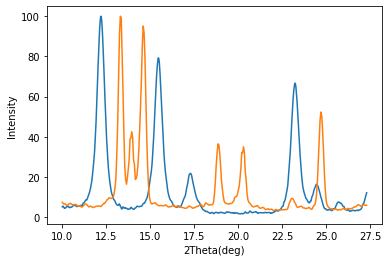

In [5]:
XRD_Analysis('XRD_example1.txt')
XRD_Analysis('XRD_example2.txt')


# You may write out function calls for Problem 1 in this cell to test your solution.


***

## PROBLEM 2

### CODE CELL

In [2]:
class Date:
    # This is the Constructor
    def __init__(self,d,m,y):
        try:
            if 1 <=d<=31 and 1<=m<=12:
                                              # d is the day, m is the month, y is the year
                self.d = d
                self.m = m
                self.y = y
                self.feb = LeapY(self.y)
                self.dom = {1:31, 2:self.feb, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
            else:
                "1"/0
        except TypeError:
                print("Incorrect date")
        
        #Accessor Methods
        def getDay(self):
            return self.d
        
        def getMonth(self):
            return self.m
        
        def getYear(self):
            return self.y
        
        def Next(self):                                  # if the date is december 31, return the first day of the next year
            if self.d == 31 and self.m == 12:            # if the date is the 31st of any other month(with 31 days), 
                return (Date(1,1,self.y + 1))            # return the first day of the next month
            elif self.d == self.dom[self.m]:             # if the date is not the 31st, return the next day
                return (Date(1,self.m + 1, self.y))
            else:
                return (Date(self.d + 1, self.m, self.y))
            
        def Prev(self):                         # if date is 1st day of 1st month, return dec 31 of previous year
            if self.d == 1 and self.m == 1:     # if the month is first day of march in a leap year, return feb 29 
                return (Date(1,1,self.y - 1))   # if the month is the first day of march in a non leap year, return feb 28
            elif self.d == 1:
                return (Date(self.dom[self.m - 1],self.m - 1,self.y))
            else:
                return (Date(self.d - 1,self.m,self.y))
               
        def isBefore(self,d):
            if self.y < d.y:                        # if year is smaller return True
                return True                         # if year is bigger return False
            elif self.m < d.m:                      # if year is same but month is smaller return True
                return True                         # if year is same but month is bigger return False
            elif self.d < d.d:                      # if year and month are the same, but the day is smaller return True
                return True                         # date is the same or bigger so return False
            else:
                return False
        
        def isAfter(self,d):        # if year is bigger return True
            if self.y > d.y:        # if year is smaller return False
                return True         # if year is same but month is bigger return True
            elif self.m > d.m:      # if year is same but month is smaller return False
                return True         # if year and month are the same, but the day is bigger return True
            elif self.d > d.d:      # date is the same or smaller so return False
                return True
            else:
                return False
            
        def isEqual(self,d):                                      # check if year, month and day are all the same.
            if self.d == d.d and self.m == d.m and self.y == d.y:
                return True
            else:
                return False
            
        #def add_days(self,n):
        
        #def days_between(self,d):
        
        def LeapY(self,y):      # method to check if date is in leap year, if year is divisible by 400 then year is leap
            if (self.y % 4 == 0) and ((self.y % 1 != 0) or (self.y % 400 == 0)):
                self.feb = 29   # if year is divisible by 4, 100 but not 400 then year is not leap
            else:               # if year is not divisible by 4 then year is not leap
                self.feb = 28
            return self.feb
        
    
# Place all function/class definitions required for Problem 2 in this cell.


### TESTING CELL

In [3]:

# You may write out method calls for Problem 2 in this cell to test your solution.


***

## Extra Practice Cells (note that TAs will not consider the cells below when marking)